# Tutorial sulle API di GitHub ed npm

Nome: Davide  
Cognome: Barbagallo  
Matricola: 1000016775  
Corso: Social Media Management  
Docente: Antonino Furnari  
Anno accademico: 2022/23  

# Introduzione
### GitHub
GitHub è un servizio di hosting di progetti software che usa come [version control system](https://it.wikipedia.org/wiki/Controllo_versione_distribuito) Git.  
Nata come azienda indipendente, nel 2018 è stata acquisita da Microsoft.

All'interno, gli utenti possono registrarsi e creare della **repository**, con visibilità pubblica o privata, in cui è possibile caricare il codice sorgente di un applicativo. Le repository sono organizzate in **branch**, di cui una principale, chiamata *main* o *master*, ed altre secondarie, relative all'implementazione di una nuova feature oppure alla risoluzione di un bug. Branch diverse hanno generalmente codice diverso.
È anche possibile creare delle **issue**, topic in cui utenti discutono di un determinato problema del codice. Una volta discusso, gli sviluppatori possono aprire una **pull request** collegata alla issue, richiedendo il *merge* del codice relativo alla branch associata alla pull request dentro la branch principale.  
Di recente, GitHub ha aggiunto la possibilità di associare a determinate comandi Git delle azioni, chiamate *GitHub Actions*, che agevolano il flusso di lavoro come la compilazione e la distribuzione dell'applicativo legato alla repository.

### npm
Node Package Manager, abbreviato npm, è il gestore di pacchetti ufficiale dell'ambiente JavaScript Node.js.

All'interno, gli utenti possono scaricare i **pacchetti** pubblicati attraverso un tool da linea di comando ed utilizzarli all'interno di progetti JavaScript.  
I pacchetti, pubblici e privati, sono conservati all'interno di un **database** online. Ogni pacchetto ha dedicata una pagina all'interno del sito [npmjs.com](https://www.npmjs.com/) in modo che gli utenti interessati possono visualizzarne i dettagli, come il README.md, generalmente contenente lo scopo del pacchetto e la sua guida all'installazione, il numero di download settimanali ed i creatori del pacchetto, chiamati **maintainers**.  
Tutti gli sviluppatori JavaScript possono creare e pubblicare un pacchetto all'interno di npm.

### Link utili
- [Documentazione API su GitHub](https://docs.github.com/en/rest)
- [Documentazione API su npm](https://github.com/npm/registry)


### Obbiettivo
L'obbiettivo del tutorial è studiare se esiste una correlazione fra il numero di commit settimanali su GitHub ed il numero di download settimanali su npm, cioè di verificare dunque se, una libreria mantenuta e curata riceve più download di una libreria meno curata.  
Prenderemo in esame una specifica *"classe"* di pacchetti, in particolari i framework utilizzati per la generazione di [Single Page Application](https://it.wikipedia.org/wiki/Single-page_application).  
In particolare esamineremo i seguenti pacchetti:
- React: [GitHub](https://github.com/facebook/react) - [npm](https://www.npmjs.com/package/react)
- Angular: [GitHub](https://github.com/angular/angular) - [npm](https://www.npmjs.com/package/@angular/core)
- Vue: [GitHub](https://github.com/vuejs/vue) - [npm](https://www.npmjs.com/package/vue)
- Svelte: [GitHub](https://github.com/sveltejs/svelte) - [npm](https://www.npmjs.com/package/svelte)
- Solid: [GitHub](https://github.com/solidjs/solid) - [npm](https://www.npmjs.com/package/solid-js)
- Ember: [GitHub](https://github.com/emberjs/ember.js) - [npm](https://www.npmjs.com/package/ember-source)

# Autenticazione

### GitHub
Come riporta la [documentazione di GitHub](https://docs.github.com/en/rest/guides/getting-started-with-the-rest-api), per l'utilizzo delle API è necessario essere **autenticati**.  
La piattaforma ci permette di utilizzare diversi metodi per poter generare un token di autenticazione, a seconda della complessità del sistema software che deve usare le API:
- GitHub Apps
- OAuth Apps
- Personal access tokens

Nel nostro caso, la nostra applicazione non ha i requisiti per poter utilizzare le GitHub Apps (servono per creare estensioni di GitHub, come client desktop) oppure le OAuth Apps (esse seguono il paradigma web e quindi non sono utilizzabili nel nostro caso).  
L'unica alternativa rimasta sono i **personal access token**.  
GitHub utilizza dei token chiamati **fine-grained personal access tokens** che ci permettono di definire, in fase di generazione, le azioni che gli utenti in possesso del token possono svolgere.

Per la creazione di un token, accediamo al nostro account GitHub ed andiamo nella sezione **Settings -> Developer Settings**.  
Ci ritroveremo in questa schermata:

![Developer Settings Screen](images/developer-settings.png)

Spostandoci nella sezione **Personal access tokens** ed entrando nella sottosezione **fine-grained personal access tokens**, ci ritroveremo in questa schermata:

![Developer Settings Fine Access Token Screen](images/developer-settings-fine-token.png)

Cliccando su **Generate new token**, ci ritroveremo in questa schermata:

![Fine Access Token Creation Screen](images/developer-settings-fine-token-creation.png)

Noteremo i seguenti campi da compilare:
- Token name: nome del token. Lo useremo per distinguerlo dagli altri.
- Expiration: scadenza del token. Superata questa data, il token non permetterà di fare nessuna richiesta.
- Description (opzionale): descrizione dello scopo del token.
- Resource owner: il proprietario del token. Corrisponde all'account che stiamo usando per generare il token. Nel caso in cui l'utente faccia parte di organizzazioni, esse potranno comparire fra le opzioni.
- Repository access: repository pubbliche e private a cui il token ci permette di accedere. Nel nostro caso, analizzeremo solo repo pubbliche, quindi lo impostiamo a *Public Repositories (read-only)*.
- Permissions: azioni permesse che gli utenti in possesso del token possono svolgere, come le interazioni con altri utenti. Di default, tutte le azioni sono impostate su *No access*. Nel nostro caso, non abbiamo bisogno di svolgere particolari azioni e possiamo quindi lasciare tutto com'è.

Compilato, il nostro form avrà questa struttura:

![Fine Access Token Creation Filled Screen](images/developer-settings-fine-token-creation-filled.png)

Cliccando su **Generate Token**, ci ritroveremo in questa schermata:

![Fine Access Token Creation Filled Screen](images/developer-settings-fine-token-generated-hidden.png)

Da notare che GitHub ci segnala che avremo accesso al token **solo una volta**. Una volta cambiata pagina, non sarà più possibile accedervi e dovremo generarne uno nuovo.  
Una volta inserito all'interno del sistema software, dovremmo allegarlo come **Header** della richiesta nella voce **Authorization**, in questo modo:
```
Authorization: Bearer <GITHUB-TOKEN>
```

### npm
A differenza di GitHub, le API di npm sono ad accesso libero e non necessitano alcun tipo di autenticazione.

# Estrazione dei dati

### GitHub
Per estrarre il numero di commit settimanali da una repository, usiamo l'API [get-the-weekly-commit-count](https://docs.github.com/en/rest/metrics/statistics#get-the-weekly-commit-count).  
Dato in input il proprietario della repo ed il nome della repo, essa ritorna un oggetto con due proprietà:
- `all`, un array di numeri di 52 elementi, ognuno indicante il numero totali di commit svolti in una settimana da tutti i collaboratori alla repository nell'ultimo anno.
- `owner`, un array di numeri di 52 elementi, ognuno indicante il numero totali di commit svolti in una settimana solo dal creatore della repository nell'ultimo anno.

Questa suddivisione in due array ci permette di poter ricavare:
- il numero totale di commit settimanali.
- il numero totale di commit settimanali fatti dal proprietario della repository.
- il numero totale di commit settimanali fatti dai collaboratori della repository, ottenibili sottraendo ai commit totali, i commit del proprietario.

A noi interessano solo i commit totali, perciò considereremo solo il campo `all`.

Estraiamo dunque i dati da GitHub:

In [20]:
import os

import dotenv
import requests

dotenv.load_dotenv()

github_repo_owners = ['facebook', 'angular', 'vuejs', 'sveltejs', 'solidjs', 'emberjs']
github_repo_names = ['react', 'angular', 'vue', 'svelte', 'solid', 'ember.js']
github_stats = dict()

def get_github_stats(owner: str, name: str):
    url_request = 'https://api.github.com/repos/{}/{}/stats/participation'.format(owner, name)
    headers = { 'Authorization': 'Bearer {}'.format(os.getenv('ACCESS_TOKEN')), 'accept': 'application/vnd.github+json' }
    response = requests.get(url_request, headers=headers)
    data = response.json()
    return data['all']

for i in range(len(github_repo_owners)):
    weekly_activity = get_github_stats(github_repo_owners[i], github_repo_names[i])
    github_stats[github_repo_names[i]] = weekly_activity

### npm
Per estrarre il numero di download da un pacchetto, utilizziamo l'API [downloads/range](https://github.com/npm/registry/blob/master/docs/download-counts.md).  
Dato in input il nome del package ed il range di date da esaminare, essa ritorna un oggetto con le seguenti proprietà:`
- `start`: una data indicante l'inizio del range.
- `end`: una data indicante la fine del range.
- `package`: una stringa indicante il nome del pacchetto esaminato.
- `downloads`: un array di oggetti, ognuno rappresentante un giorno specifico ed il numero di download avvenuti quel giorno.

Estraiamo quindi i dati da npm:

In [21]:
from datetime import date

import requests
from dateutil.relativedelta import relativedelta

npm_packages_names = ['react', '@angular/core', 'vue', 'svelte', 'solid-js', 'ember-source']
npm_packages_stats = dict()

def get_npm_stats(package_name: str):
    now = date.today()
    past_years = now - relativedelta(years=1)
    url_request = 'https://api.npmjs.org/downloads/range/{}:{}/{}'.format(past_years, now, package_name)
    response = requests.get(url_request)
    data = response.json()
    return data

for package_name in npm_packages_names:
    response = get_npm_stats(package_name)
    npm_packages_stats[package_name] = dict()
    npm_packages_stats[package_name]['daily'] = list(map(lambda element : element['downloads'], response['downloads']))

Come specificato prima, i dati sono divisi su base giornaliera e non settimanale.
Per aggregarli, vanno raccolti i giorni in gruppi da 7 elementi e sommando i download dei singoli elementi.

Utilizziamo questo funzione:

In [22]:
import functools
import math


def merge_npm_days(package_name: str):
    downloads_list = npm_packages_stats[package_name]['daily']
    weeks_count = math.ceil(len(downloads_list) / 7)
    weeks_total = [0] * weeks_count
    i = weeks_count - 1
    while i >= 0:
        week_elements = downloads_list[-7:]
        downloads_list = downloads_list[:len(downloads_list) - 7]
        week_total = functools.reduce(lambda acc, curr : acc + curr, week_elements, 0)
        weeks_total[i] = week_total
        i -= 1
    return weeks_total
        
for package_name in npm_packages_names:
    weekly_download = merge_npm_days(package_name)
    npm_packages_stats[package_name]['weekly'] = weekly_download

# Elaborazione dei dati
Per mettere in relazione i dati, occorre studiarne il loro andamento settimanale.
Generiamo dei grafici in modo da poter capire meglio il numero di commit / download nel corso delle ultime 52 settimane.

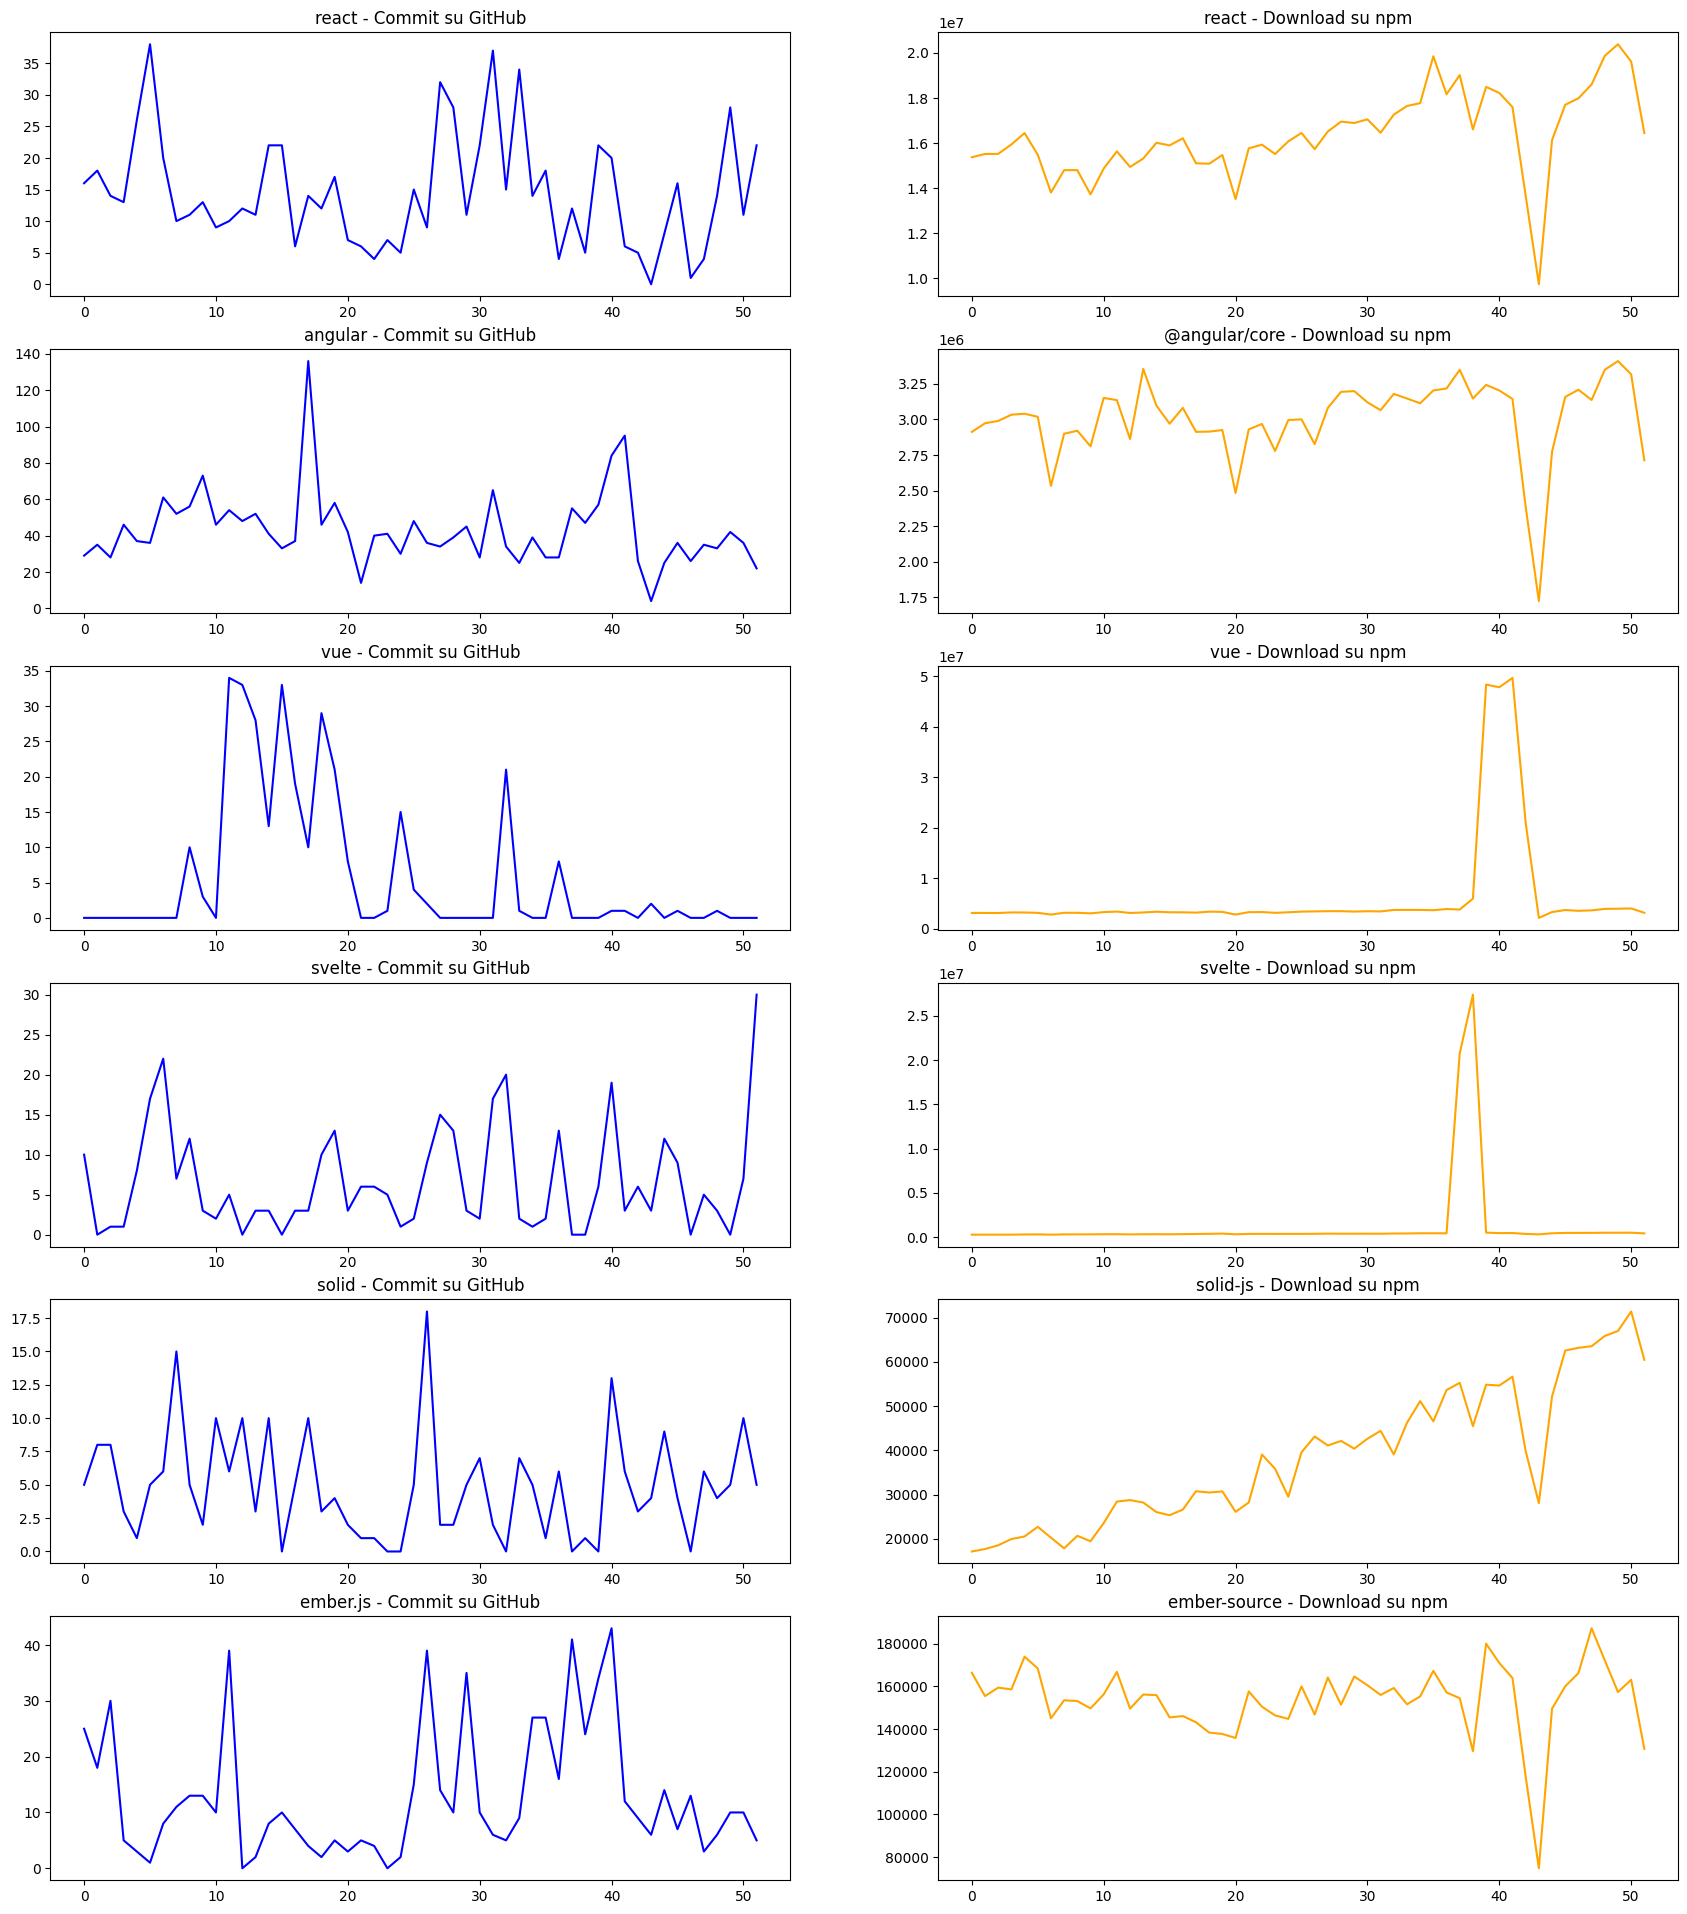

In [38]:
from matplotlib import pyplot as plt

github_stats_keys = list(github_stats.keys())
npm_packages_stats_keys = list(npm_packages_stats.keys())

def generate_lib_plot(package_index, axis):
    day_list = range(52)
    github_list = github_stats[github_stats_keys[i]][-52:]
    npm_list = npm_packages_stats[npm_packages_stats_keys[i]]['weekly'][-52:]
    axis[i][0].plot(day_list, github_list, 'blue')
    axis[i][0].set_title("{} - Commit su GitHub".format(github_stats_keys[i]))
    axis[i][1].plot(day_list, npm_list, 'orange')
    axis[i][1].set_title("{} - Download su npm".format(npm_packages_stats_keys[i]))
n_rows = len(github_stats_keys)
n_cols = 2
(fig, axis) = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(21, 24)
for i in range(len(github_stats_keys)):
    generate_lib_plot(i, axis)
plt.show()

Combiniamo insieme i diagrammi per studiarne l'andamento contemporaneamente.
Visto che i dati hanno ordini di grandezza diversa, occorre effettuare una normalizzazione, dove:
- il valore 0 corrisponde a 0.
- il valore massimo all'interno dell'array corrisponde ad 1.

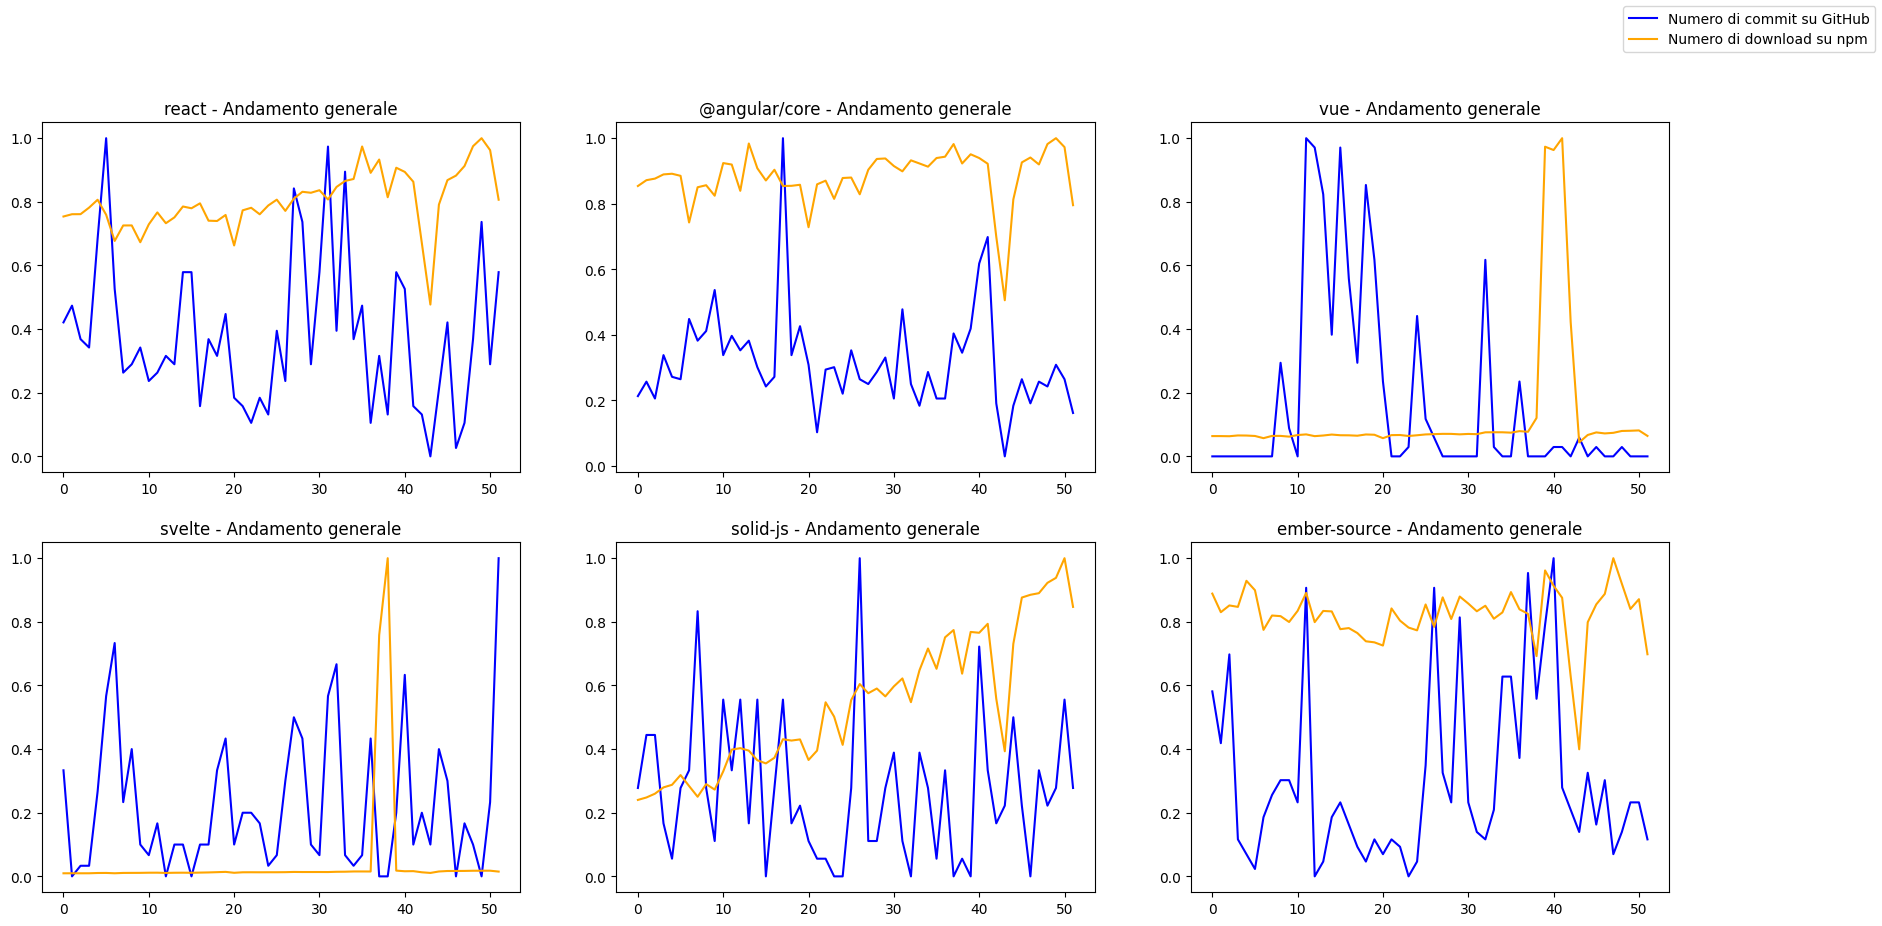

In [44]:
from matplotlib import pyplot as plt

import math

def normalize_graphs(package_index, axis):
    day_list = range(52)
    github_list = github_stats[github_stats_keys[i]][-52:]
    npm_list = npm_packages_stats[npm_packages_stats_keys[i]]['weekly'][-52:]
    max_github_list = max(github_list)
    max_npm_list = max(npm_list)
    normalized_github_list = list(map(lambda element : element / max_github_list, github_list))
    normalized_npm_list = list(map(lambda element : element / max_npm_list, npm_list))
    axis.plot(day_list, normalized_github_list, 'blue')
    axis.plot(day_list, normalized_npm_list, 'orange')
    axis.set_title("{} - Andamento generale".format(npm_packages_stats_keys[i]))
    
n_rows = 2
n_cols = 3
(fig, axis) = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(21, 10)
for i in range(len(github_stats_keys)):
    x_pos = math.floor(i / n_cols)
    y_pos = i % n_cols
    normalize_graphs(i, axis[x_pos][y_pos])
fig.legend(['Numero di commit su GitHub', 'Numero di download su npm'])
plt.show()

Normalizzando i valori e sovrapponendo i grafici, vediamo che ad un alto numero di download non corrisponde necessariamente un alto numero di commit, cosi come per un basso numero di download non corrisponde un basso numero di commit.  
Possiamo quindi concludere che **non esiste** nessuna correlazione fra il numero di download di una libreria su npm ed il numero di commit sulla repository GitHub.